# Conjectural Criticism Lab

Welcome to the lab!  
In this exercise, you will fine-tune a causal language model (CLM) to **restore missing characters** in short texts — a computational analogue of *conjectural criticism*, where scholars reconstruct damaged or incomplete manuscripts.

To make the task accessible and language-independent, the basic version uses a simple English dataset of **children’s stories**.  
You will prepare the dataset, introduce artificial gaps, and train a small model to fill them.

---

## Requirements for Higher Grades

### VG 1 / 3
In addition to the basic English experiment, submit a **second version** where you fine-tune the model on a dataset of your own choice in **any language other than English**.

### VG 2 / 3
Create and apply your **own text-normalization strategy**, instead of the default one used in the tutorial.  
Include a short explanation in your notebook describing:
- what you changed  
- why you chose that normalization  
- how it may influence the model’s performance

---

In [ ]:
# This cell downloads 1,000 streaming children’s stories, normalizes them,
# truncates to 750 characters, and saves them as a clean JSONL file.

from datasets import load_dataset
import re
import json

# Load streaming dataset
ds_stream = load_dataset(
    "ajibawa-2023/Children-Stories-Collection", split="train", streaming=True
)


# Take first N items from the stream
def take_first_n(stream, n=1000):
    count = 0
    for item in stream:
        yield item
        count += 1
        if count == n:
            break


subset = list(take_first_n(ds_stream, 1000))


# Normalize and truncate text
def clean(text):
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text[:750]


for item in subset:
    item["text"] = clean(item["text"])

# Save dataset to JSONL
out_path = "children_stories_1000_clean.jsonl"
with open(out_path, "w") as f:
    for item in subset:
        f.write(json.dumps(item) + "\n")

print("Saved:", out_path)

In [ ]:
# This cell previews the first few lines of the cleaned dataset file.
!head /content/children_stories_1000_clean.jsonl

In [ ]:
# This cell loads the cleaned JSONL file, extracts the story text,
# shuffles it, and splits it into train/val/test base sets.

import json
import random

INPUT_FILE = "content/children_stories_1000_clean.jsonl"

stories = []
with open(INPUT_FILE, "r") as f:
    for line in f:
        stories.append(json.loads(line)["text"])

# NOTE: If this is a reference to Thracia 776 please notify me lol
random.seed(776)
random.shuffle(stories)

train_base = stories[:800]  # used to generate ~8k examples
val_base = stories[800:900]  # used to generate ~1k examples
test_base = stories[900:1000]  # used to generate ~1k examples

print(len(train_base), len(val_base), len(test_base))

# Task: Generate Training, Validation, and Test Samples

In this task, you will write a Python script that iterates over your cleaned dataset and creates **8,000 training samples**, **1,000 validation samples**, and **1,000 test samples** for gap-filling.

Each sample must follow this format:

- a `system` message with the instruction
- a `user` message containing the story text with a masked span like `[6 letters missing]`
- an `assistant` message containing the **exact missing characters**, excluding spaces and perhaps punctuation (you are free to do as you wish and motivate your choices..

Your script should save three files:

Wrote 8000 examples → /content/gap_train.jsonl
Wrote 1000 examples → /content/gap_val.jsonl
Wrote 1000 examples → /content/gap_test.jsonl

Each line must be a JSON object like this:

```json
{
  "messages": [
    {"role": "system", "content": "Restore the missing characters in this children's story."},
    {"role": "user", "content": " ... example text with a mask like [6 letters missing] ... "},
    {"role": "assistant", "content": "exact missing letters"}
  ]
}
```

Below are several example lines so you understand the structure:

Your job:
- Write the script that generates these datasets exactly in this format.
- Use your train/val/test base story lists (train_base, val_base, test_base).
- The masking must select a random span of letters (0–10 characters), replace it with a placeholder like [7 letters missing], and store the removed characters exactly.

You will place your finished code in a Python cell after this Markdown block.


```json
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " in a bustling city, there was a hardworking logistics company named swift deliveries. they had one big challenge - managing their huge warehouse filled with 5,000 different toys! each toy had its own demand and space needs, making things complicated. to solve this puzzle, they brought together a group of smart friends: anna, the organized artist; benny, the helpful scientist; and coach carlos, who loved sports and teamwork. anna suggested, “why don’t we sort toys by how often they're demanded? we can call them a, b, and c toys!” she drew a simple chart showing 'a' toys were asked for most frequently while 'c' toys were rarely wanted. this became their first step – warehouse layout optimization! benny added,[1 letters missing]e need to place a toys near th"}, {"role": "assistant", "content": " “w"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " one sunny day, robby the robin decided to go on an adventure. he saw a big green mountain in the distance and thought, “that looks like a fun challenge! i want to climb all the way to the top.” so, he packed his tiny backpack with some food and water, spread his wings wide, and took off towards the mountain. as robby flew closer to the mountain, he noticed something interesting – the air felt thinner than usual. it made him flap harder to keep moving forward. his friend zara, a wise old owl, happened to fly by and asked, “robby, do you know why the air feels so thin here?” robby tilted hi[6 letters missing]uzzled. with her kind eyes, zara explained, “you see, we live near sea level where earth's atmosphere has more oxygen molecules available for us "}, {"role": "assistant", "content": "s head, p"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " in a bustling city lived a helpful robot named robo. one sunny day, his best friend, a curious little girl named lily, gave him a task. \"robo,\" she said, \"can you go to the park and bring me back a pretty flower?\" \"of course, lily! i will follow your command.\" and so, robo began his journey. he walked a few steps forward, then remembered lily had asked him to turn left after taking some steps. so he turned left and continued walking. suddenly, he saw a big red stop sign on his way. \"oh n[4 letters missing]ught robo, \"lily didn't tell me what to do when i see a stop sign!\" then, he realized that stopping was necessary before crossing any road safely. this idea reminded him of another important concept - traffic lights. red meant stop, yellow meant prep"}, {"role": "assistant", "content": "o!\" tho"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " little rexy the dinosaur loved watchi[10 letters missing]with his family. his favorite team were the redskins, known for their fierce red color and mighty roar! but lately, something strange has been happening - every time they play against the steeldinos, they seem to lose. in fact, it had been five times in a row! one sunny afternoon while playing outside, rexy met tricky the triceratops who asked him why he looked so glum. rexy sighed and told tricky how frustrated he felt about the redskins never winning against the steeldinos. curious, tricky wanted to know more about these matches, especially because each tribe represented different types of energy conversion. \"you see,\" explained rexy, \"during a football game, both teams convert potential e"}, {"role": "assistant", "content": "ng football "}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " one sunny day, mrs. young took her three curious boys – reyn, rhys, and rory – on a puzzling adventure. they decided to build a huge puzzle of their favorite animal, the majestic lion! mrs. young brought out a big box containing 300 interlocking pieces. she looked a[7 letters missing]s and said, \"let's see how quickly we can put this magnificent lion together!\" reyn started first, carefully sorting and arranging his share of the puzzle pieces. with concentration etched on his face, he managed to place exactly 25 pieces. seeing reyn's progress, competitive rhys jumped in next. he wanted to do better than his older brother and challenged himself by saying, \"i will place twice as many pieces as reyn did.\" true enough, after some effort, rhys successful"}, {"role": "assistant", "content": "t her boy"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " in the heart of new york sta[10 letters missing] a tiny city named sherrill, home to around 3,000 curious little creatures called the 'sherrilings'. these adorable beings lived harmoniously amongst each other, exploring their small yet fascinating world every day. one sunny morning, two sherriling friends - bimble and fizz - decided they wanted to meet everyone in their city. they embarked on their adventure, eagerly visiting house after house, greeting every sherrilling they met along the way. as they continued their journey, they began to notice something peculiar; despite being so close to the larger cities surrounding them, sherrill seemed almost hidden from the rest of the world. \"why do you think we're the smallest city in all of new york s"}, {"role": "assistant", "content": "te, there was"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " once upon a time, in a small town called factville, lived two best friends – tommy the taleweaver and sally the scientist. they loved exploring the world around them and sharing what they learned with others. one day, they found an old book in the library labeled “the adventures of captain conjecture”. captain conjecture was known throughout the [8 letters missing]is thrilling tales, but no one knew if his stories were true or not. he claimed to have discovered new galaxies and met alien creatures! tommy and sally decided to read the book to find out more about this mysterious captain. as they read, they noticed something peculiar: captain conjecture always seemed to exaggerate or leave out important details. for example, he said he could travel fa"}, {"role": "assistant", "content": "land for h"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " in a magical forest lived little numbers who dreamed of becoming part of something bigger. they watched as their friends, the trees, stood tall and proud, each branch and leaf connected to a strong trunk. the numbers wished they too could join together and create something wonderful. one day, whiz, the wisest number, had an idea! he shared his plan with the other numbers: “we can use our values to build a magnificent structure – a binary tree!” excitement buzzed among the little numb[9 letters missing]y gathered around whiz, eager to learn how. whiz explained, “each of us will become a ‘node’, which has three parts: a value, and two empty branches called 'left' and 'right'. we'll take turns connecting ourselves based on our size.” observer, anoth"}, {"role": "assistant", "content": "ers, and the"}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " once upon a time, in a small town named harmonyville, lived three best friends - timmy the turtle, sally the squirrel, and max the monkey. they were curious little creatures who loved exploring their surroundings and learning new things. one day, they came across a strange device called the \"blockbox.\" it was said to have magical powers that could help people keep track of things and make sure everyone involved in moving those things stayed honest and worked together efficiently. timmy asked, \"but how does this magic thing work?\" sally explained, \"well, imagine we want[6 letters missing]apples to another town. we put each apple into a special box with a unique code, like a fingerprint. then, every time someone touches or moves the box, their informa"}, {"role": "assistant", "content": " to send "}]}
{"messages": [{"role": "system", "content": "Restore the missing characters in this children's story."}, {"role": "user", "content": " in a bustling town of grammarville, lived two curious friends named syd and lex. they loved exploring language and its many wonders. one sunny day, they found themselves pondering over two puzzling questions. syd asked, \"can you help me understand how to use 'would,' 'could,' 'should,' 'would have,' 'could have,' 'should have,' 'would have been,' 'could have been,' and 'should have been' correctly?\" lex thought for a moment and replied, \"well, those are called modal verbs, which show different degrees of possibility, ability, or advice. like when we say, 'you could eat your vegetables before dessert,' we mean it's possible for you to eat veggies firs[10 letters missing], another friend, bri, joined them and said she had a different question, \"guy"}, {"role": "assistant", "content": "t.\" meanwhile"}]}

```

In [ ]:
from pathlib import Path

PROJECT_DIR = Path(globals()["_dh"][0])


def generate_10_maskings(story: str) -> tuple[list[str], list[str]]:
    story_with_masks = []
    masked_strings = []

    for _ in range(10):
        num_letters_to_remove = random.randint(1, 10)
        last_removable_char_index = len(story) - num_letters_to_remove * 2 - 1
        first_char_to_remove_index = random.randint(0, last_removable_char_index)

        while not story[first_char_to_remove_index].isalpha():
            first_char_to_remove_index = random.randint(0, last_removable_char_index)

        passed_chars_counter = 0
        letters_masked = 0
        masked_string = ""

        while letters_masked != num_letters_to_remove:
            next_char_to_add = story[first_char_to_remove_index + passed_chars_counter]
            masked_string += next_char_to_add

            if next_char_to_add.isalpha():
                letters_masked += 1

            passed_chars_counter += 1

        story_with_mask = (
            story[:first_char_to_remove_index]
            + f"[{num_letters_to_remove} letters missing]"
            + story[first_char_to_remove_index + passed_chars_counter :]
        )

        story_with_masks.append(story_with_mask)
        masked_strings.append(masked_string)

    return story_with_masks, masked_strings


def generate_and_save_maskings_json_file(data_split: list[str], data_split_name: str):
    masked_stories = []
    hints = []

    for story in data_split:
        story_maskings, story_hints = generate_10_maskings(story)
        masked_stories.extend(story_maskings)
        hints.extend(story_hints)

    json_messages = []
    for masked_story, hint in zip(masked_stories, hints):
        json_messages.append(
            {
                "message": [
                    {
                        "role": "system",
                        "content": "Restore the missing characters in this children's story.",
                    },
                    {"role": "user", "content": masked_story},
                    {"role": "assistant", "content": hint},
                ]
            }
        )

    path_to_jsonl_file = str(
        Path(PROJECT_DIR, "content", f"gap_{data_split_name}.jsonl")
    )
    with open(path_to_jsonl_file, "w") as jsonl_file:
        for json_message in json_messages:
            json.dump(json_message, jsonl_file)
            jsonl_file.write("\n")


generate_and_save_maskings_json_file(
    train_base,
    "train",
)

generate_and_save_maskings_json_file(
    val_base,
    "val",
)

generate_and_save_maskings_json_file(
    test_base,
    "test",
)

**===========**

**Before proceding, switch to GPU T4 runtime!**

**===========**

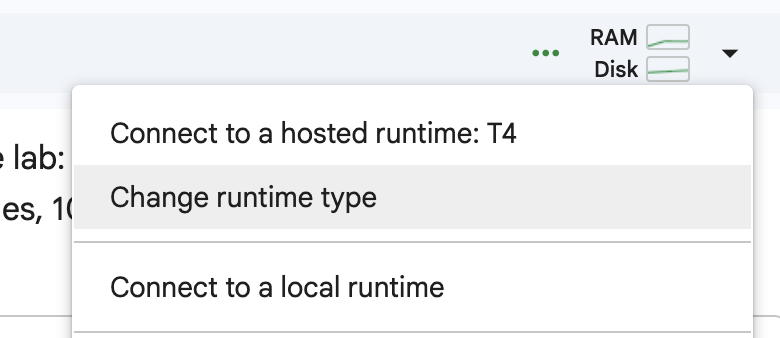

In [ ]:
# This cell installs all required packages for training with Unsloth,
# including PyTorch, Triton, Transformers, BitsAndBytes, and Unsloth itself.
# It uses UV for fast dependency resolution and installs GPU-compatible wheels
# when running inside Google Colab.

# %%capture
import os, importlib.util

!pip install --upgrade -qqq uv

if importlib.util.find_spec("torch") is None or "COLAB_" in "".join(os.environ.keys()):
    try:
        import numpy, PIL

        get_numpy = f"numpy=={numpy.__version__}"
        get_pil = f"pillow=={PIL.__version__}"
    except:
        get_numpy = "numpy"
        get_pil = "pillow"

    !uv pip install -qqq \
        "torch>=2.8.0" \
        "triton>=3.4.0" \
        {get_numpy} \
        {get_pil} \
        torchvision \
        bitsandbytes \
        "transformers==4.56.2" \
        "unsloth_zoo[base] @ git+https://github.com/unslothai/unsloth-zoo" \
        "unsloth[base] @ git+https://github.com/unslothai/unsloth" \
        git+https://github.com/triton-lang/triton.git@05b2c186c1b6c9a08375389d5efe9cb4c401c075#subdirectory=python/triton_kernels

elif importlib.util.find_spec("unsloth") is None:
    !uv pip install -qqq unsloth

!uv pip install --upgrade --no-deps \
    transformers==4.56.2 tokenizers trl==0.22.2 unsloth unsloth_zoo

In [ ]:
# This cell loads the Qwen3-0.6B model using Unsloth's FastLanguageModel loader.
# The model is loaded in 4-bit precision to reduce GPU memory usage,
# and full fine-tuning is disabled so we can attach LoRA adapters later.
# We are just doing this for the sake of demonstration, for optimal performance we would use larger model, other parameters of course.

from unsloth import FastLanguageModel
import torch

max_seq_length = 1024
dtype = None

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Qwen3-0.6B",
    dtype=dtype,
    max_seq_length=max_seq_length,
    load_in_4bit=True,
    full_finetuning=False,
)

In [ ]:
# This cell adds a LoRA adapter to the base model so we can fine-tune it efficiently.
# Only a small subset of parameters will be trained (the LoRA layers),
# which greatly reduces GPU memory consumption.
# Gradient checkpointing is enabled to further lower memory usage during training.

model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    lora_alpha=16,
    lora_dropout=0,
    random_state=42,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    use_gradient_checkpointing="unsloth",
)

In [ ]:
# This cell loads the generated training, validation, and test datasets
# from the JSONL files created earlier. Each dataset consists of chat-style
# message dictionaries used for supervised fine-tuning.

from datasets import load_dataset

train_ds = load_dataset("json", data_files="/content/gap_train.jsonl", split="train")
val_ds = load_dataset("json", data_files="/content/gap_val.jsonl", split="train")
test_ds = load_dataset("json", data_files="/content/gap_test.jsonl", split="train")

In [ ]:
# This cell converts each sample's structured chat messages into a single
# text string using the model's chat template. This is required by the trainer,
# which expects a plain "text" field containing the full conversation.


def formatting_prompts_func(examples):
    msgs = examples["messages"]
    text = tokenizer.apply_chat_template(
        msgs, tokenize=False, add_generation_prompt=False
    )
    return {"text": text}


train_ds = train_ds.map(formatting_prompts_func)
val_ds = val_ds.map(formatting_prompts_func)
test_ds = test_ds.map(formatting_prompts_func)

In [ ]:
# This cell configures how the trainer should mask tokens so that the model
# only learns from the assistant's response and not from the system/user text.
# We specify which parts of the chat template correspond to the user message
# and which correspond to the assistant message.

from unsloth.chat_templates import train_on_responses_only

gpt_oss_kwargs = dict(
    instruction_part="<|im_start|>user",
    response_part="<|im_start|>assistant",
)

In [ ]:
# This cell configures and launches supervised fine-tuning (SFT) on the Qwen3 model.
# We use a relatively large batch size for efficiency, an 8-bit optimizer to save memory,
# and evaluation + checkpoint saving every 50 steps.
# Early stopping is enabled to automatically halt training when validation loss stops improving.
# `train_on_responses_only` masks system/user tokens so the model only learns the assistant's output.
def formatting_func(example):
    return example["text"]


from trl import SFTConfig, SFTTrainer
from transformers import EarlyStoppingCallback

training_args = SFTConfig(
    output_dir="outputs",
    per_device_train_batch_size=128,
    learning_rate=2e-4,
    logging_steps=10,
    warmup_steps=20,
    max_steps=5000,
    fp16=True,
    bf16=False,
    optim="adamw_8bit",
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="none",
)

early_stop = EarlyStoppingCallback(
    early_stopping_patience=3,
    early_stopping_threshold=0.0001,
)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    args=training_args,
    callbacks=[early_stop],
)

# Mask user/system messages; train only on assistant output.
trainer = train_on_responses_only(trainer, **gpt_oss_kwargs)

# Begin training
trainer_stats = trainer.train()

**VG 3/3**

Write a cell that evaluates the model on samples from the test set on lengths between 1–10 characters. Report an averege CER. The results don't have to be good.